# Homework 2 - Traditional ML Models using SciKit-Learn

## Install the runtime dependencies
This includes `numpy==1.23.5`, and `scikit-learn==1.2.2`.

In [1]:
## Install the environment

#!pip install numpy==1.23.5 scikit-learn==1.2.2

In [2]:
## Import necessary libraries, define some helper functions
import os
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
print("sklearn: ", sklearn.__version__)
import numpy as np
print("numpy: ", np.__version__)


def evaluate(y_pred: np.ndarray, y_test: np.ndarray):
  report = classification_report(y_test, y_pred, target_names=iris.target_names)
  cm: np.ndarray = confusion_matrix(y_test, y_pred)
  return report, cm

import seaborn as sns
from matplotlib import pyplot as plt

def subplot(confusion_matrix: any, title: str, ax: plt.Axes) -> None:
    """
    Create a subplot with a heatmap displaying a confusion matrix.

    Args:
        confusion_matrix (List[List[int]] or List[List[float]]): The confusion matrix to be displayed.
            Rows represent the ground truth, and columns represent predicted values.
        title (str): The title for the subplot.
        ax (plt.Axes): The Matplotlib Axes where the heatmap should be plotted.

    Returns:
        None
    """
    sns.heatmap(confusion_matrix, annot=True, fmt='d', ax=ax)
    ax.set_ylabel('Ground Truth')
    ax.set_xlabel('Predicted')
    ax.set_title(title)


def subplot_loss_history(history: dict, title: str, ax: plt.Axes) -> None:
    """
    Create a subplot to visualize loss history during training.

    Args:
        history (dict): A dictionary containing training history information, typically obtained from
            Keras' model.fit() method.
        title (str): The title for the subplot.
        ax (plt.Axes): The Matplotlib Axes where the loss history plot should be plotted.

    Returns:
        None
    """
    ax.plot(history.history['loss'])
    ax.plot(history.history['val_loss'])
    ax.set_title(title)
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.legend(['Train', 'Test'], loc='upper right')

sklearn:  1.2.2
numpy:  1.23.5


## 1. Data loading

We load the data from the sklearn dataset

In [3]:
## 1. Data loading
from sklearn import datasets
iris = datasets.load_iris()

## 2. Data visualization

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


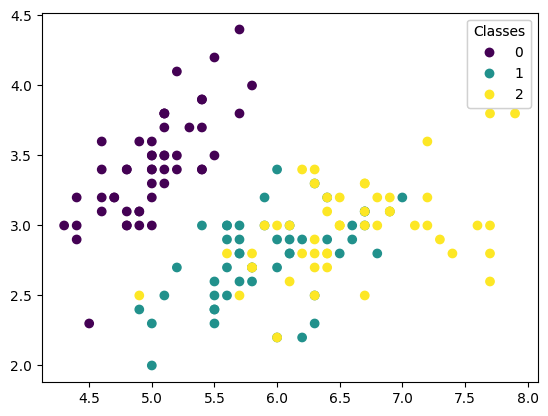

In [4]:
## 2. Iris visualization

print(iris.data.shape)  # (150, 4)
print(iris.target.shape)  # (150,)
print(iris.feature_names)  # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
print(iris.target_names)  # ['setosa', 'versicolor', 'virginica']


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# Scatter plot for sepal length and width
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.show()

## 3. Split the dataset

We perform a 30/70 split on the data. We are using only 45 of the 150 total samples for training!

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.7, random_state=4920)

## 4. Build and train a simple logisitic regression

with a maximum of 500 iterations.

In [6]:
## 4. build and train a simple logisitic regression model
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logreg = LogisticRegression(max_iter=500)

# Train the model
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=500)

## 5. Prediction & Evaluate - Logistic Regression

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.85      0.93      0.89        30
   virginica       0.94      0.85      0.89        34

    accuracy                           0.93       105
   macro avg       0.93      0.93      0.93       105
weighted avg       0.94      0.93      0.93       105

[[41  0  0]
 [ 0 28  2]
 [ 0  5 29]]


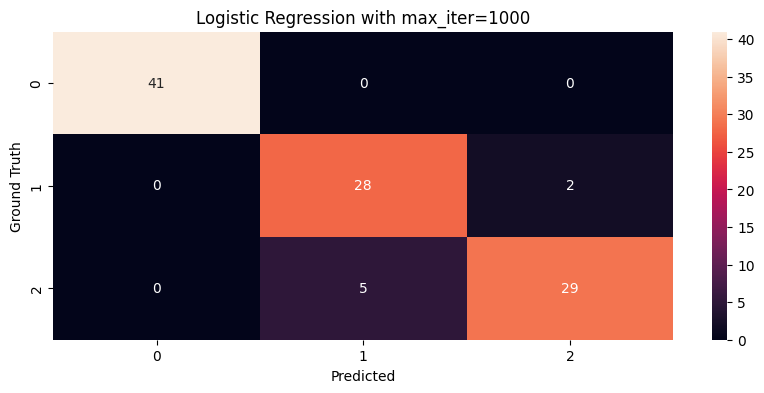

In [7]:
# Make predictions, then evaluate
report_logistic, cm_logistic = evaluate(y_test, logreg.predict(x_test))
print(report_logistic)
print(cm_logistic)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
subplot(cm_logistic, "Logistic Regression with max_iter=1000", ax)

# Problem 3 - K-Nearest Neighbors (KNN), with hyper-parameter tuning

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Best parameters:  {'n_neighbors': 4}
Best cross-validation score:  0.975
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.91      0.97      0.94        31
   virginica       0.97      0.91      0.94        33

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105

[[41  0  0]
 [ 0 30  1]
 [ 0  3 30]]


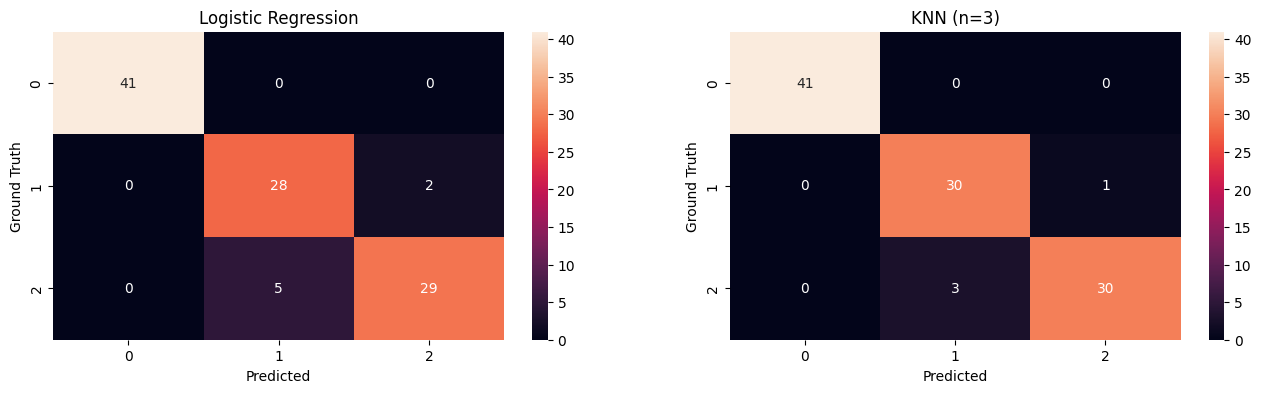

In [8]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 31)}
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)

print("Best parameters: ", grid.best_params_)
print("Best cross-validation score: ", grid.best_score_)

report_knn, cm_knn = evaluate(y_test, grid.predict(x_test))
print(report_knn)
print(cm_knn)
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
subplot(cm_logistic, "Logistic Regression", ax[0])
subplot(cm_knn, "KNN (n=3)", ax[1])

# Problem 4 - Naive Bayes
Scikit-Learn provides support for `GaussianNB`, `MultinomialNB`, and `BernoulliNB`.

- `GaussianNB` is used when the features are continuous and follow a normal distribution.
- `MultinomialNB` is used for discrete counts, such as text classification.
- `BernoulliNB` is used for binary/boolean features.

In the case of the iris dataset, the features are continuous but not necessarily normally distributed. However, `GaussianNB` can still be a good starting point.

              precision    recall  f1-score   support

      setosa       0.98      1.00      0.99        40
  versicolor       0.82      0.90      0.86        30
   virginica       0.94      0.83      0.88        35

    accuracy                           0.91       105
   macro avg       0.91      0.91      0.91       105
weighted avg       0.92      0.91      0.91       105

[[40  0  0]
 [ 1 27  2]
 [ 0  6 29]]


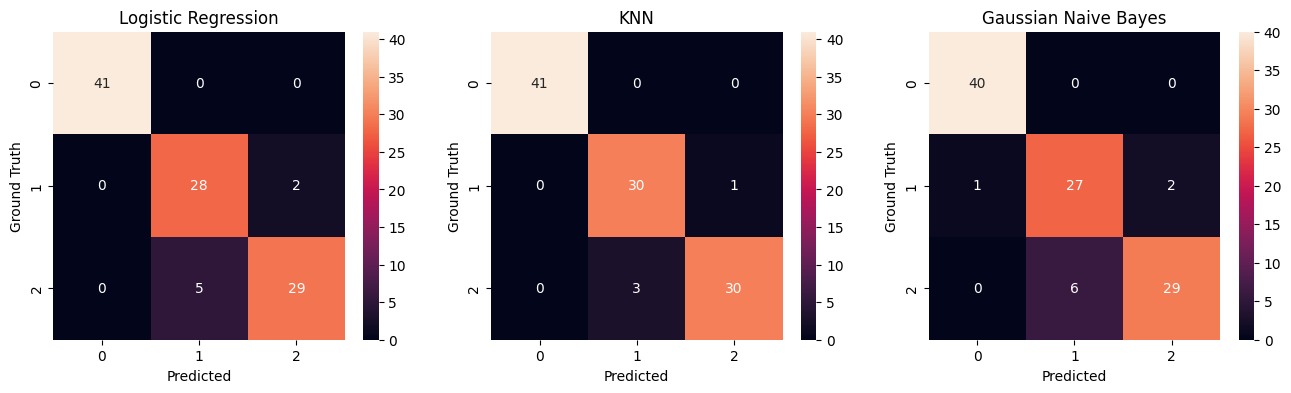

In [9]:
## GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

report_gnb, cm_gnb = evaluate(y_test, gnb.predict(x_test))
print(report_gnb)
print(cm_gnb)
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
subplot(cm_logistic, "Logistic Regression", ax[0])
subplot(cm_knn, "KNN", ax[1])
subplot(cm_gnb, "Gaussian Naive Bayes", ax[2])

# Problem 5 - Decision Tree (DT)

The DecisionTreeClassifier in scikit-learn has several parameters. Here are some:

- `criterion`: Used to measure the quality of a split. Default value is "gini" for the Gini impurity, and the other one is "entropy" for  information gain.

- `max_depth`: Controls the maximum depth of the tree. If the value is too high, the model may overfit. If it's too low, the model may underfit.

- `min_samples_split`: Determines the minimum number of samples required to split an internal node. If the value is too high, the model may underfit. If its too low, the model may overfit. minimum value = 2.

- `min_samples_leaf`: Determines the minimum number of samples required to be at a leaf node. If the value is too high, the model may underfit. If the value is too low, the model may overfit.

We will experiment with these parameters to see how they affect the performance of the model.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00         0
  versicolor       0.94      0.41      0.57        75
   virginica       0.90      0.93      0.92        30

    accuracy                           0.56       105
   macro avg       0.61      0.45      0.50       105
weighted avg       0.93      0.56      0.67       105
 [[ 0  0  0]
 [41 31  3]
 [ 0  2 28]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.94      0.91      0.93        34
   virginica       0.90      0.93      0.92        30

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105
 [[41  0  0]
 [ 0 31  3]
 [ 0  2 28]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.91      0.97      0.94        31
 

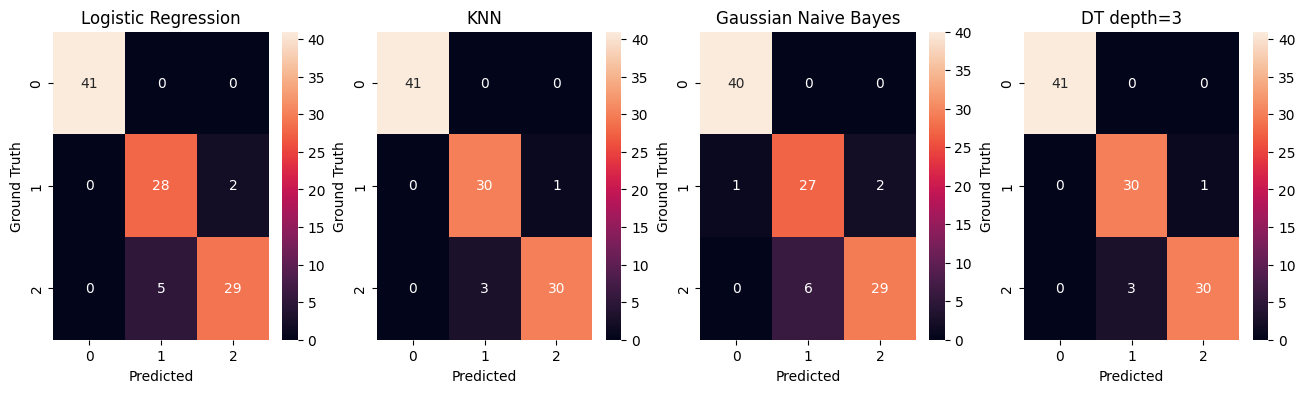

In [16]:
# DT
from sklearn.tree import DecisionTreeClassifier

def fit_then_evaluate(classifier):
  classifier.fit(x_train, y_train)
  report, cm = evaluate(y_test, classifier.predict(x_test))
  print(report, cm)
  return report, cm

fit_then_evaluate(DecisionTreeClassifier(max_depth=1))
fit_then_evaluate(DecisionTreeClassifier(max_depth=2))
fit_then_evaluate(DecisionTreeClassifier(max_depth=3))
fit_then_evaluate(DecisionTreeClassifier(max_depth=3, criterion="entropy"))
fit_then_evaluate(DecisionTreeClassifier(max_depth=3, criterion="entropy", min_samples_split=100))
fit_then_evaluate(DecisionTreeClassifier(max_depth=3, criterion="entropy", min_samples_split=2))
fit_then_evaluate(DecisionTreeClassifier(max_depth=3, criterion="entropy", min_samples_split=5, min_samples_leaf=5))

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)

report_dt, cm_dt = evaluate(y_test, dt.predict(x_test))
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
subplot(cm_logistic, "Logistic Regression", ax[0])
subplot(cm_knn, "KNN", ax[1])
subplot(cm_gnb, "Gaussian Naive Bayes", ax[2])
subplot(cm_dt, "DT depth=3", ax[3])

# Problem 6 - Bagging with RandomForest, AdaBoost, & Gradient Boosting

Ensemble learning methods can often improve the performance of a base decision tree model, but it's not always ture. The performance depends on the complexity of the problem, the quality and quantity of the data, and the settings of the ensemble method.

## RandomForest

In [11]:
# randomforest
from sklearn.ensemble import RandomForestClassifier

fit_then_evaluate(RandomForestClassifier(n_estimators=1, random_state=372))
fit_then_evaluate(RandomForestClassifier(n_estimators=10, random_state=372))
fit_then_evaluate(RandomForestClassifier(n_estimators=100, random_state=372))
fit_then_evaluate(RandomForestClassifier(n_estimators=1000, random_state=372))

rf = RandomForestClassifier(n_estimators=10, random_state=372)
rf.fit(x_train, y_train)
report_rf, cm_rf = evaluate(y_test, rf.predict(x_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.94      0.91      0.93        34
   virginica       0.90      0.93      0.92        30

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105
 [[41  0  0]
 [ 0 31  3]
 [ 0  2 28]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.91      0.91      0.91        33
   virginica       0.90      0.90      0.90        31

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105
 [[41  0  0]
 [ 0 30  3]
 [ 0  3 28]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.91      0.91      0.91        33
 

## AdaBoost

AdaBoost is a boosting algorithm that fits a sequence of weak learners on different weighted training data. It starts by predicting the original data set and gives equal weight to each observation. If the prediction is incorrect using the first learner, then it gives higher weight to the observation which has been predicted incorrectly, continuing to add learner(s) until a limit is reached in the number of models or accuracy.

In [12]:
## adaboost
from sklearn.ensemble import AdaBoostClassifier

fit_then_evaluate(AdaBoostClassifier(n_estimators=10, learning_rate=0.01, random_state=372))
fit_then_evaluate(AdaBoostClassifier(n_estimators=10, learning_rate=0.1, random_state=372))
fit_then_evaluate(AdaBoostClassifier(n_estimators=10, learning_rate=1.0, random_state=372))

fit_then_evaluate(AdaBoostClassifier(n_estimators=100, learning_rate=0.01, random_state=372))
fit_then_evaluate(AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=372))
fit_then_evaluate(AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=372))

ab = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=372)
ab.fit(x_train, y_train)
report_ab, cm_ab = evaluate(y_test, ab.predict(x_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.94      0.91      0.93        34
   virginica       0.90      0.93      0.92        30

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105
 [[41  0  0]
 [ 0 31  3]
 [ 0  2 28]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.91      0.97      0.94        31
   virginica       0.97      0.91      0.94        33

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105
 [[41  0  0]
 [ 0 30  1]
 [ 0  3 30]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.91      0.97      0.94        31
 

## Gradient Boosting

Gradient Boosting produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. The idea behind gradient boosting is to combine many simple models (also known as "weak learners"), to create an ensemble of models that can predict whether an instance of data belongs to a particular class. The algorithm works in a stage-wise fashion, where in each stage a regression tree is fit on the negative gradient. The predictions from all the trees are then added together to create the final prediction. This is the "boosting" aspect of the gradient boosting algorithm. The "gradient" in gradient boosting comes from the fact that the algorithm uses gradient descent to minimize the loss when adding new models. This means that each new tree that is added to the ensemble is trained to correct the errors made by the existing ensemble. However, it can be sensitive to overfitting if the data is noisy, and requires careful tuning of different hyperparameters.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.91      0.94      0.92        32
   virginica       0.94      0.91      0.92        32

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105
 [[41  0  0]
 [ 0 30  2]
 [ 0  3 29]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.91      0.97      0.94        31
   virginica       0.97      0.91      0.94        33

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105
 [[41  0  0]
 [ 0 30  1]
 [ 0  3 30]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.91      0.97      0.94        31
 

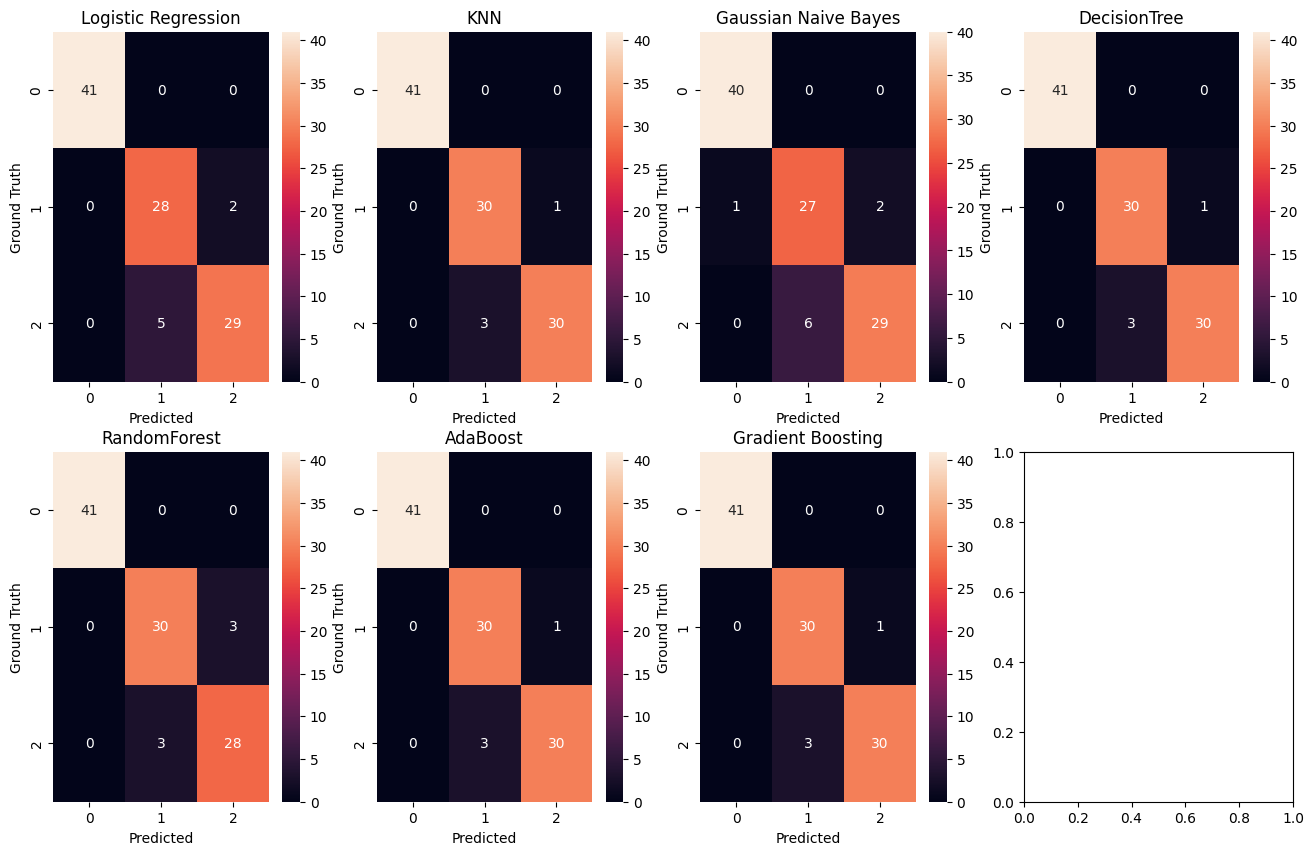

In [17]:
# gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

fit_then_evaluate(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=372))
fit_then_evaluate(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=372))
fit_then_evaluate(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=372))

fit_then_evaluate(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=372))
fit_then_evaluate(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=372))
fit_then_evaluate(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10, random_state=372))

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10, random_state=372)
gb.fit(x_train, y_train)

report_gb, cm_gb = evaluate(y_test, gb.predict(x_test))
fig, ax = plt.subplots(2, 4, figsize=(16, 10))
subplot(cm_logistic, "Logistic Regression", ax[0][0])
subplot(cm_knn, "KNN", ax[0][1])
subplot(cm_gnb, "Gaussian Naive Bayes", ax[0][2])
subplot(cm_dt, "DecisionTree", ax[0][3])
subplot(cm_rf, "RandomForest", ax[1][0])
subplot(cm_ab, "AdaBoost", ax[1][1])
subplot(cm_gb, "Gradient Boosting", ax[1][2])

# Problem 7 - SVM

We will experiment with different kernels (linear, polynomial, RBF, and sigmoid), different kernel coefficients gamma, and different values for the Penalty parameter C of the error term.

- The kernel function is used to transform the data into a higher dimensional space to make it possible to perform the linear separation.

- Gamma is a parameter for non-linear hyperplanes and the higher the gamma value, it will try to exactly fit the training data set.

- C is the penalty parameter of the error term. It controls the trade-off between smooth decision boundary and classifying the training points correctly.

In [28]:
## SVM
from sklearn.svm import SVC

fit_then_evaluate(SVC(kernel='linear', gamma='scale', C=1.0))
fit_then_evaluate(SVC(kernel='poly', gamma='scale', C=1.0))
fit_then_evaluate(SVC(kernel='rbf', gamma='scale', C=1.0))
fit_then_evaluate(SVC(kernel='sigmoid', gamma='scale', C=1.0))

fit_then_evaluate(SVC(kernel='rbf', gamma='auto', C=1.0))
fit_then_evaluate(SVC(kernel='rbf', gamma=0.001, C=1.0))
fit_then_evaluate(SVC(kernel='rbf', gamma=0.01, C=1.0))
fit_then_evaluate(SVC(kernel='rbf', gamma=0.1, C=1.0))
fit_then_evaluate(SVC(kernel='rbf', gamma=1, C=1.0))
fit_then_evaluate(SVC(kernel='rbf', gamma=10, C=1.0))

fit_then_evaluate(SVC(kernel='rbf', gamma='auto', C=0.0005))
fit_then_evaluate(SVC(kernel='rbf', gamma='auto', C=0.5))
fit_then_evaluate(SVC(kernel='rbf', gamma='auto', C=2))
fit_then_evaluate(SVC(kernel='rbf', gamma='auto', C=8))
fit_then_evaluate(SVC(kernel='rbf', gamma='auto', C=128))
fit_then_evaluate(SVC(kernel='rbf', gamma='auto', C=16384))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.91      0.94      0.92        32
   virginica       0.94      0.91      0.92        32

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105
 [[41  0  0]
 [ 0 30  2]
 [ 0  3 29]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.85      0.93      0.89        30
   virginica       0.94      0.85      0.89        34

    accuracy                           0.93       105
   macro avg       0.93      0.93      0.93       105
weighted avg       0.94      0.93      0.93       105
 [[41  0  0]
 [ 0 28  2]
 [ 0  5 29]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.88      0.94      0.91        31
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

('              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        41\n  versicolor       0.82      0.93      0.87        29\n   virginica       0.94      0.83      0.88        35\n\n    accuracy                           0.92       105\n   macro avg       0.92      0.92      0.92       105\nweighted avg       0.93      0.92      0.92       105\n',
 array([[41,  0,  0],
        [ 0, 27,  2],
        [ 0,  6, 29]]))

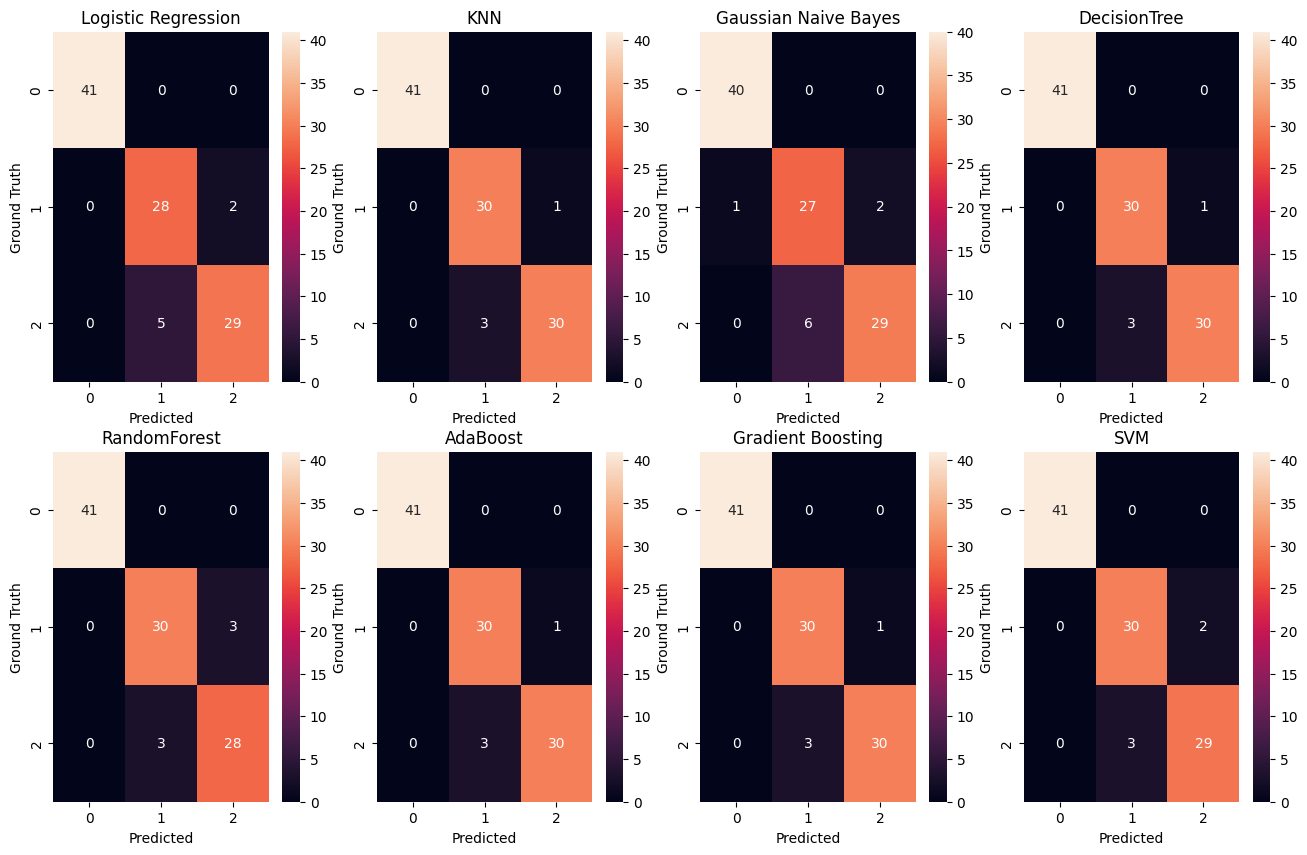

In [30]:
svm = SVC(kernel='rbf', gamma='auto', C=2)
svm.fit(x_train, y_train)

report_svm, cm_svm = evaluate(y_test, svm.predict(x_test))
fig, ax = plt.subplots(2, 4, figsize=(16, 10))
subplot(cm_logistic, "Logistic Regression", ax[0][0])
subplot(cm_knn, "KNN", ax[0][1])
subplot(cm_gnb, "Gaussian Naive Bayes", ax[0][2])
subplot(cm_dt, "DecisionTree", ax[0][3])
subplot(cm_rf, "RandomForest", ax[1][0])
subplot(cm_ab, "AdaBoost", ax[1][1])
subplot(cm_gb, "Gradient Boosting", ax[1][2])
subplot(cm_svm, "SVM", ax[1][3])

# Double-Checking using 10-fold Cross validation

Since my results were so consistently good with the 30/70 split, with only 45 of the total 150 samples being used for training, I was a bit dubious. So, I am running all my best models against a 10-fold cross-validation and listing the results here.


In [44]:
from sklearn.model_selection import cross_val_score

def cv_verify(model, name, cv=10):
  scores = cross_val_score(model, iris.data, iris.target, cv=cv)
  print(cv, "- fold cross-validation mean score for ", name, ": ", scores.mean())

cv_verify(logreg, "Logisitic Regression")
cv_verify(knn, "KNN")
cv_verify(gnb, "Gaussian NaiveBayes")
cv_verify(dt, "DecisionTree")
cv_verify(rf, "RandomForest")
cv_verify(ab, "AdaBoost")
cv_verify(gb, "Gradient Boosting")
cv_verify(svm, "SVM")

10 - fold cross-validation mean score for  Logisitic Regression :  0.9733333333333334
10 - fold cross-validation mean score for  KNN :  0.9666666666666668
10 - fold cross-validation mean score for  Gaussian NaiveBayes :  0.9533333333333334
10 - fold cross-validation mean score for  DecisionTree :  0.96
10 - fold cross-validation mean score for  RandomForest :  0.9533333333333334
10 - fold cross-validation mean score for  AdaBoost :  0.9333333333333333
10 - fold cross-validation mean score for  Gradient Boosting :  0.96
10 - fold cross-validation mean score for  SVM :  0.9800000000000001


		 Logisitic Regression
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150
 [[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
		 KNN
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.92      0.95        50
   virginica       0.92      0.98      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150
 [[50  0  0]
 [ 0 46  4]
 [ 0  1 49]]
		 Gaussian NaiveBayes
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
 

Text(0.5, 0.98, '10-fold Cross-Validation')

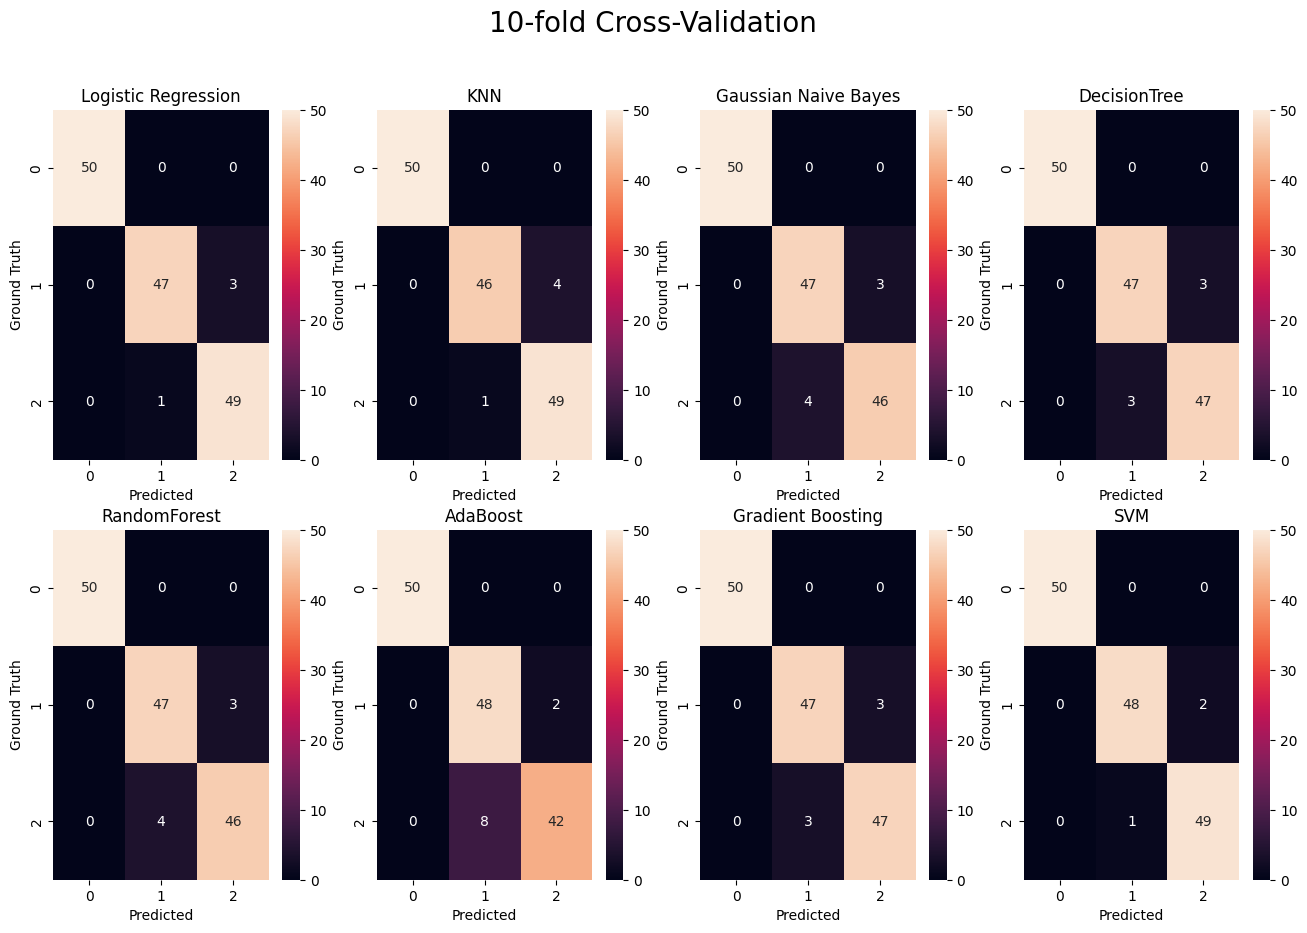

In [54]:
from sklearn.model_selection import cross_val_predict

def cv_predict(model, name, cv=10):
  predictions = cross_val_predict(model, iris.data, iris.target, cv=cv)
  report = classification_report(iris.target, predictions, target_names=iris.target_names)
  cm = confusion_matrix(iris.target, predictions)
  print("\t\t", name)
  print(report, cm)
  return cm

cv_cm_logistic = cv_predict(logreg, "Logisitic Regression")
cv_cm_knn = cv_predict(knn, "KNN")
cv_cm_gnb = cv_predict(gnb, "Gaussian NaiveBayes")
cv_cm_dt = cv_predict(dt, "DecisionTree")
cv_cm_rf = cv_predict(rf, "RandomForest")
cv_cm_ab = cv_predict(ab, "AdaBoost")
cv_cm_gb = cv_predict(gb, "Gradient Boosting")
cv_cm_svm = cv_predict(svm, "SVM")

fig, ax = plt.subplots(2, 4, figsize=(16, 10))
subplot(cv_cm_logistic, "Logistic Regression", ax[0][0])
subplot(cv_cm_knn, "KNN", ax[0][1])
subplot(cv_cm_gnb, "Gaussian Naive Bayes", ax[0][2])
subplot(cv_cm_dt, "DecisionTree", ax[0][3])
subplot(cv_cm_rf, "RandomForest", ax[1][0])
subplot(cv_cm_ab, "AdaBoost", ax[1][1])
subplot(cv_cm_gb, "Gradient Boosting", ax[1][2])
subplot(cv_cm_svm, "SVM", ax[1][3])
fig.suptitle('10-fold Cross-Validation', fontsize=20)

These results are rather impressive. Using 10-fold cross-validation, meaning, for 150 samples, using only 15 samples for training, we got the results in the confusion matrix above.

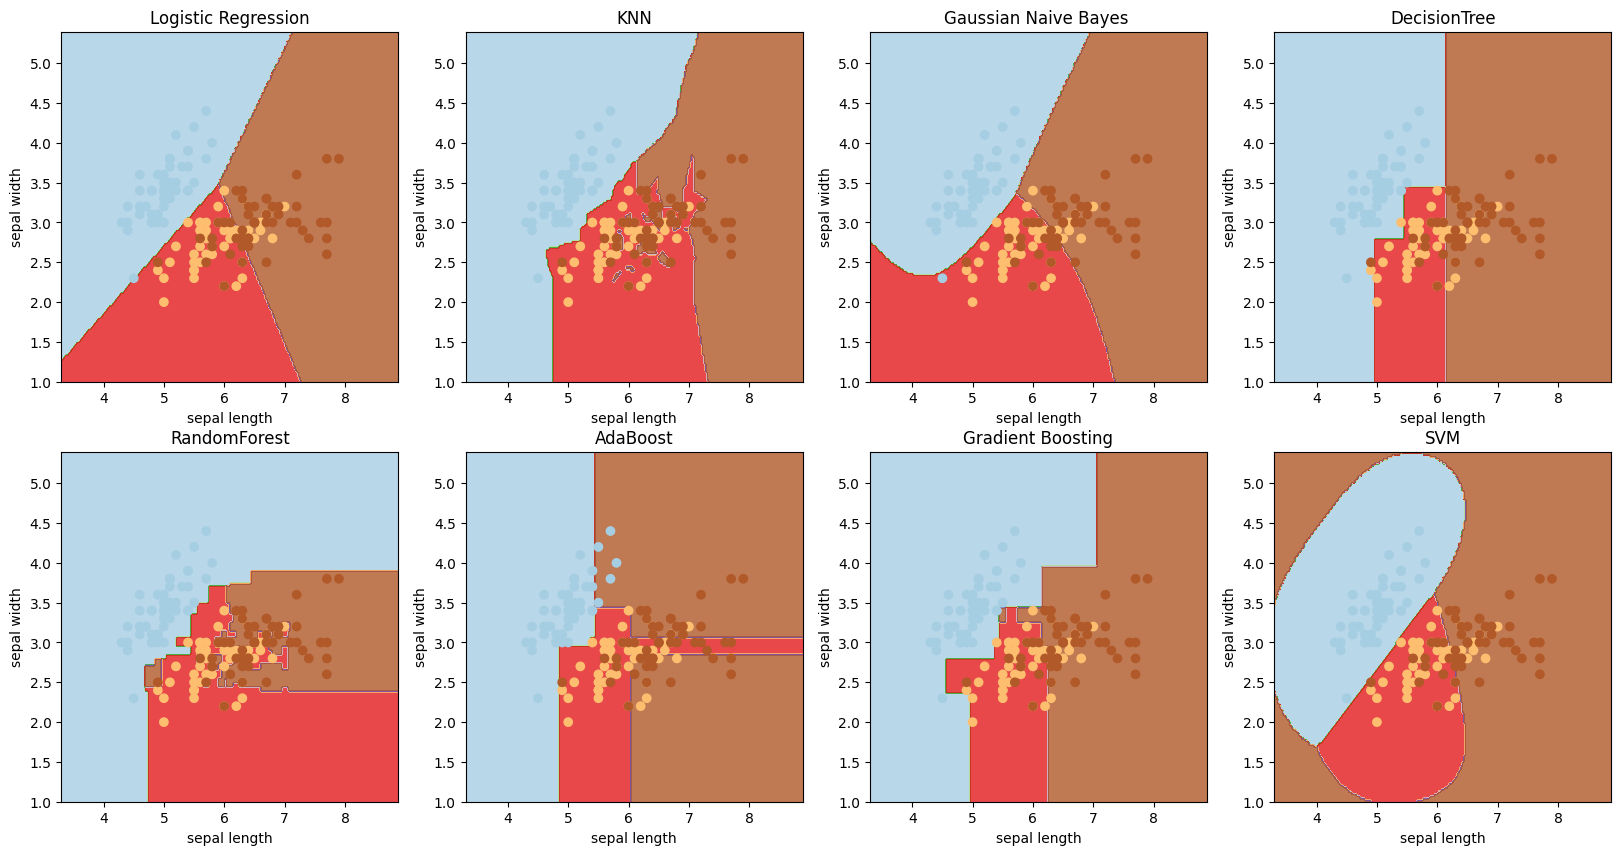

In [104]:
cmap=plt.cm.Paired

def plot_decision_boundary(model, name, ax, cv=10, X = iris.data[:, [0, 1]], y = iris.target):
  # Create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  h = (x_max / x_min)/100
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


  model.fit(X, y)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  Z = Z.reshape(xx.shape)
  ax.set_title(name)
  ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.8)
  ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
  ax.set_xlabel('sepal length')
  ax.set_ylabel('sepal width')
  ax.set_xlim(xx.min(), xx.max())

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
plot_decision_boundary(LogisticRegression(max_iter=500), "Logistic Regression", ax[0][0])
plot_decision_boundary(GridSearchCV(KNeighborsClassifier(), {'n_neighbors': range(1, 3)}, cv=10, scoring='accuracy'), "KNN", ax[0][1])
plot_decision_boundary(GaussianNB(), "Gaussian Naive Bayes ", ax[0][2])
plot_decision_boundary(GridSearchCV(DecisionTreeClassifier(), {'max_depth': range(1, 4), 'min_samples_split': range(2, 5), 'min_samples_leaf': range(2, 5)}, cv=10, scoring='accuracy'), "DecisionTree", ax[0][3])
plot_decision_boundary(GridSearchCV(RandomForestClassifier(random_state=372), {'n_estimators': [2, 10, 100]}, cv=5, scoring='accuracy'), "RandomForest", ax[1][0])
plot_decision_boundary(GridSearchCV(AdaBoostClassifier(random_state=372), {'n_estimators': [2, 10, 100], 'learning_rate': [1, 2]}, cv=5, scoring='accuracy'), "AdaBoost", ax[1][1])
plot_decision_boundary(GridSearchCV(GradientBoostingClassifier(random_state=372), {'n_estimators': [2, 10, 100], 'learning_rate': [1, 2], 'max_depth': [2, 10]}, cv=5, scoring='accuracy'), "Gradient Boosting", ax[1][2])
plot_decision_boundary(GridSearchCV(SVC(kernel='rbf'), {'gamma': [0.1, 1, 10], 'C': [2, 0.2, 8]}, cv=5, scoring='accuracy'), "SVM", ax[1][3])